# Part I. Multi-layer Feedforward Neural Network for Classification

## a Select Important Features

In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
label_data = pd.read_csv("~/Desktop/Applied Machine Learning/Assignment 3/hw3_labeled_data.csv")

In [4]:
label_data.head()

,Unnamed: 0,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,patient_0,56,80,1.010,1,0,1,1,0,0,...,40,11800,5.0,1,1,0,0,1,0,1
1,patient_1,70,70,1.010,1,0,1,0,1,1,...,27,9600,3.4,0,1,0,0,0,0,1
2,patient_2,76,70,1.015,1,0,1,1,0,0,...,32,9600,3.7,1,0,0,1,0,0,1
3,patient_3,51,60,1.025,0,0,1,1,0,0,...,49,8300,5.2,0,0,0,1,0,0,0
4,patient_4,58,70,1.025,0,0,1,1,0,0,...,53,9100,5.2,0,0,0,1,0,0,0


In [119]:
label_data = pd.get_dummies(label_data, columns = ['sg','al','su'])

In [120]:
label_data.columns

Index(['Unnamed: 0', 'age', 'bp', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu', 'sc',
       'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad', 'appet',
       'pe', 'ane', 'classification', 'sg_1.005', 'sg_1.01', 'sg_1.015',
       'sg_1.02', 'sg_1.025', 'al_0', 'al_1', 'al_2', 'al_3', 'al_4', 'al_5',
       'su_0', 'su_1', 'su_2', 'su_3', 'su_4', 'su_5'],
      dtype='object')

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


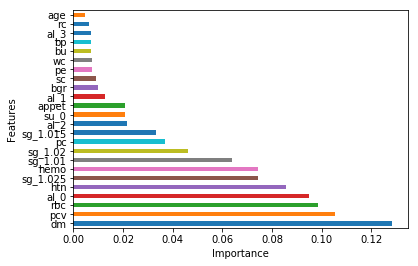

In [123]:
x = label_data.drop(columns = ['classification','Unnamed: 0'])
y = label_data['classification']
model = ExtraTreesClassifier()
model.fit(x, y)
model.feature_importances_
feat_importance = pd.Series(model.feature_importances_, index = x.columns)
feat_importance.nlargest(24).plot(kind = 'barh')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

In [125]:
feat_importance.nlargest(4).index

Index(['dm', 'pcv', 'rbc', 'al_0'], dtype='object')

From the plot above, it can be found that the importance of fratures has a immediately drop after dm, so I choose al, hemo, htn, pcv, dm as predictive features.

## b Propose a deep learning-based model development plan

1. Make a feed-forward neural network cosisting of 5 hidden layers, each hidden layer was activated by "Relu" and output layer was activated by "sigmoid".
2. Split the labeled data into a training portion and a validation portion with ratio of 0.8 and 0.2 respectively.
3. I plan to use 0.001 for learning rate and 0.8 for momentum to optimize hyperparameters.
4. Dropout was used on hidden layers in neural network to avoid overfitting.

## c Train a feed-forward neural network model proposed in part b

In [126]:
selected_feature = ['al_0','pcv','rbc','dm']
X = label_data[selected_feature]
X.head()

,al_0,pcv,rbc,dm
0,0,40,1,1
1,0,27,1,1
2,0,32,1,0
3,1,49,1,0
4,1,53,1,0


In [127]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
scaled_X = scaler.transform(X)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [128]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [129]:
#import tensorflow as tf
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import SGD

In [130]:
x_train.shape

(240, 4)

In [131]:
model = keras.Sequential([
layers.Dense(50, input_dim = x_train.shape[1],kernel_initializer='normal'),
layers.Dense(50, activation='relu'),
layers.Dropout(0.2),
layers.Dense(50, activation='relu'),
layers.Dropout(0.2),
layers.Dense(50, activation='relu'),
layers.Dropout(0.2),
layers.Dense(50, activation='relu'),
layers.Dropout(0.2),
layers.Dense(50, activation='relu'),
layers.Dropout(0.2),
layers.Dense(1, activation='sigmoid')
]
)

sgd = SGD(lr=0.001, momentum=0.8, decay=0.0, nesterov=False)
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [132]:
model.fit(x_train,y_train,epochs = 1000)

Epoch 1/1000
240/240 [==============================] - 0s 1ms/sample - loss: 0.7057 - acc: 0.4542
Epoch 2/1000
240/240 [==============================] - 0s 91us/sample - loss: 0.6917 - acc: 0.5125
Epoch 3/1000
240/240 [==============================] - 0s 94us/sample - loss: 0.7081 - acc: 0.4417
Epoch 4/1000
240/240 [==============================] - 0s 80us/sample - loss: 0.7041 - acc: 0.4333
Epoch 5/1000
240/240 [==============================] - 0s 59us/sample - loss: 0.7018 - acc: 0.4708
Epoch 6/1000
240/240 [==============================] - 0s 61us/sample - loss: 0.6897 - acc: 0.5667
Epoch 7/1000
240/240 [==============================] - 0s 62us/sample - loss: 0.6889 - acc: 0.5667
Epoch 8/1000
240/240 [==============================] - 0s 62us/sample - loss: 0.6865 - acc: 0.5667
Epoch 9/1000
240/240 [==============================] - 0s 66us/sample - loss: 0.6936 - acc: 0.5375
Epoch 10/1000
240/240 [==============================] - 0s 62us/sample - loss: 0.6917 - acc: 0.5917


240/240 [==============================] - 0s 57us/sample - loss: 0.5841 - acc: 0.7500
Epoch 163/1000
240/240 [==============================] - 0s 60us/sample - loss: 0.5803 - acc: 0.7583
Epoch 164/1000
240/240 [==============================] - 0s 58us/sample - loss: 0.5712 - acc: 0.7958
Epoch 165/1000
240/240 [==============================] - 0s 54us/sample - loss: 0.5878 - acc: 0.7500
Epoch 166/1000
240/240 [==============================] - 0s 55us/sample - loss: 0.5845 - acc: 0.7000
Epoch 167/1000
240/240 [==============================] - 0s 53us/sample - loss: 0.5807 - acc: 0.7583
Epoch 168/1000
240/240 [==============================] - 0s 53us/sample - loss: 0.5982 - acc: 0.7375
Epoch 169/1000
240/240 [==============================] - 0s 53us/sample - loss: 0.6010 - acc: 0.6958
Epoch 170/1000
240/240 [==============================] - 0s 56us/sample - loss: 0.6053 - acc: 0.6917
Epoch 171/1000
240/240 [==============================] - 0s 57us/sample - loss: 0.5621 - acc: 0.

240/240 [==============================] - 0s 56us/sample - loss: 0.4818 - acc: 0.7542
Epoch 323/1000
240/240 [==============================] - 0s 58us/sample - loss: 0.4122 - acc: 0.8333
Epoch 324/1000
240/240 [==============================] - 0s 58us/sample - loss: 0.4363 - acc: 0.7917
Epoch 325/1000
240/240 [==============================] - 0s 53us/sample - loss: 0.5201 - acc: 0.7375
Epoch 326/1000
240/240 [==============================] - 0s 55us/sample - loss: 0.4482 - acc: 0.7875
Epoch 327/1000
240/240 [==============================] - 0s 56us/sample - loss: 0.4822 - acc: 0.7625
Epoch 328/1000
240/240 [==============================] - 0s 55us/sample - loss: 0.4226 - acc: 0.8292
Epoch 329/1000
240/240 [==============================] - 0s 54us/sample - loss: 0.4684 - acc: 0.8125
Epoch 330/1000
240/240 [==============================] - 0s 67us/sample - loss: 0.5647 - acc: 0.7375
Epoch 331/1000
240/240 [==============================] - 0s 76us/sample - loss: 0.6144 - acc: 0.

240/240 [==============================] - 0s 57us/sample - loss: 0.5748 - acc: 0.7333
Epoch 483/1000
240/240 [==============================] - 0s 57us/sample - loss: 0.4756 - acc: 0.8000
Epoch 484/1000
240/240 [==============================] - 0s 53us/sample - loss: 0.4020 - acc: 0.8583
Epoch 485/1000
240/240 [==============================] - 0s 58us/sample - loss: 0.4592 - acc: 0.8250
Epoch 486/1000
240/240 [==============================] - 0s 55us/sample - loss: 0.3799 - acc: 0.8750
Epoch 487/1000
240/240 [==============================] - 0s 57us/sample - loss: 0.4104 - acc: 0.8500
Epoch 488/1000
240/240 [==============================] - 0s 55us/sample - loss: 0.3964 - acc: 0.8667
Epoch 489/1000
240/240 [==============================] - 0s 55us/sample - loss: 0.4143 - acc: 0.8500
Epoch 490/1000
240/240 [==============================] - 0s 54us/sample - loss: 0.5358 - acc: 0.7792
Epoch 491/1000
240/240 [==============================] - 0s 53us/sample - loss: 0.3542 - acc: 0.

240/240 [==============================] - 0s 62us/sample - loss: 0.4662 - acc: 0.7667
Epoch 643/1000
240/240 [==============================] - 0s 62us/sample - loss: 0.3635 - acc: 0.8458
Epoch 644/1000
240/240 [==============================] - 0s 58us/sample - loss: 0.4090 - acc: 0.8375
Epoch 645/1000
240/240 [==============================] - 0s 60us/sample - loss: 0.3774 - acc: 0.8542
Epoch 646/1000
240/240 [==============================] - 0s 59us/sample - loss: 0.4379 - acc: 0.8167
Epoch 647/1000
240/240 [==============================] - 0s 63us/sample - loss: 0.3785 - acc: 0.8458
Epoch 648/1000
240/240 [==============================] - 0s 61us/sample - loss: 0.3063 - acc: 0.8958
Epoch 649/1000
240/240 [==============================] - 0s 59us/sample - loss: 0.3906 - acc: 0.8458
Epoch 650/1000
240/240 [==============================] - 0s 59us/sample - loss: 0.3843 - acc: 0.8333
Epoch 651/1000
240/240 [==============================] - 0s 59us/sample - loss: 0.3604 - acc: 0.

240/240 [==============================] - 0s 69us/sample - loss: 0.3998 - acc: 0.8625
Epoch 803/1000
240/240 [==============================] - 0s 68us/sample - loss: 0.5333 - acc: 0.7917
Epoch 804/1000
240/240 [==============================] - 0s 63us/sample - loss: 0.5948 - acc: 0.7750
Epoch 805/1000
240/240 [==============================] - 0s 57us/sample - loss: 0.5239 - acc: 0.7875
Epoch 806/1000
240/240 [==============================] - 0s 68us/sample - loss: 0.5018 - acc: 0.7875
Epoch 807/1000
240/240 [==============================] - 0s 62us/sample - loss: 0.2855 - acc: 0.8875
Epoch 808/1000
240/240 [==============================] - 0s 66us/sample - loss: 0.2487 - acc: 0.9458
Epoch 809/1000
240/240 [==============================] - 0s 63us/sample - loss: 0.3220 - acc: 0.8875
Epoch 810/1000
240/240 [==============================] - 0s 64us/sample - loss: 0.2767 - acc: 0.8917
Epoch 811/1000
240/240 [==============================] - 0s 67us/sample - loss: 0.2566 - acc: 0.

240/240 [==============================] - 0s 58us/sample - loss: 0.2014 - acc: 0.9375
Epoch 963/1000
240/240 [==============================] - 0s 57us/sample - loss: 0.2010 - acc: 0.9458
Epoch 964/1000
240/240 [==============================] - 0s 55us/sample - loss: 0.2870 - acc: 0.9042
Epoch 965/1000
240/240 [==============================] - 0s 55us/sample - loss: 0.3320 - acc: 0.8708
Epoch 966/1000
240/240 [==============================] - 0s 51us/sample - loss: 0.2729 - acc: 0.8917
Epoch 967/1000
240/240 [==============================] - 0s 52us/sample - loss: 0.1851 - acc: 0.9375
Epoch 968/1000
240/240 [==============================] - 0s 53us/sample - loss: 0.2286 - acc: 0.9375
Epoch 969/1000
240/240 [==============================] - 0s 55us/sample - loss: 0.1879 - acc: 0.9417
Epoch 970/1000
240/240 [==============================] - 0s 54us/sample - loss: 0.2025 - acc: 0.9375
Epoch 971/1000
240/240 [==============================] - 0s 57us/sample - loss: 0.2252 - acc: 0.

## d Apply trained model to the validation portion of the labeled data

In [133]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [134]:
y_val_prediction = model.predict(x_val).round()
#confusion_matrix(y_val_prediction, y_val)

In [135]:
matrix = confusion_matrix(y_val_prediction, y_val, labels = [1,0])
matrix

array([[38,  0],
       [ 1, 21]])

In [136]:
tp = matrix[0][0]
fn = matrix[0][1]
fp = matrix[1][0]
tn = matrix[1][1]

In [137]:
accuracy = accuracy_score(y_val_prediction, y_val)
accuracy

0.9833333333333333

In [138]:
precision = tp/(tp+fp)
precision

0.9743589743589743

In [139]:
recall = tp/(tp+fn)
recall

1.0

In [140]:
false_positive_rate = fp/(tn+fp)
false_positive_rate

0.045454545454545456

In [141]:
F1score = 2*precision*recall/(precision+recall)
F1score

0.9870129870129869

## e Apply trained model to the unlabeled data

In [144]:
unlabel_data = pd.read_csv("~/Desktop/Applied Machine Learning/Assignment 3/hw3_unlabeled_data.csv")
unlabel_data = pd.get_dummies(unlabel_data, columns = ['sg','al','su'])

In [145]:
X_test = unlabel_data[selected_feature]
scaler.transform(X_test)
scaled_X_test = scaler.transform(X_test)
unlabel_data['classification'] = model.predict(scaled_X_test).round()
unlabel_data.to_csv("Prediction.csv",index=False)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


# Part II Unsupervised Deep Learning for Data Representation(t-SNE)

In [28]:
data = pd.read_csv('~/Desktop/Applied Machine Learning/Assignment 3/data.csv')
label = pd.read_csv('~/Desktop/Applied Machine Learning/Assignment 3/labels.csv')

In [29]:
data.head()

,Unnamed: 0,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
3,sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
4,sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


In [30]:
label.head()

,Unnamed: 0,Class
0,sample_0,PRAD
1,sample_1,LUAD
2,sample_2,PRAD
3,sample_3,PRAD
4,sample_4,BRCA


In [31]:
data = data.drop(columns = ['Unnamed: 0'])
label = label.drop(columns = ['Unnamed: 0'])

In [32]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components = 2, init = 'pca', random_state = 0)
result = tsne.fit_transform(data)

In [33]:
y=label['Class'].values

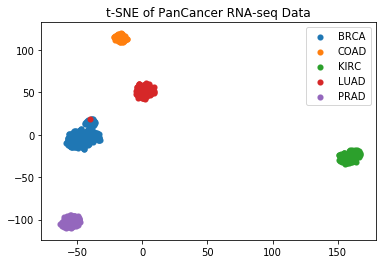

In [34]:
for i in np.unique(y):
    plt.scatter(result[y == i,0],
               result[y == i,1],
               lw = 0.1,
               label = i)
plt.title('t-SNE of PanCancer RNA-seq Data')
plt.legend()

High-Dimension data was projected into 2-dimention data. From the plot, it is can be found that all five cluster were well separated except for one point of "LUAD" was misclassified as "BRCA".